<b>A Self-Organizing Map (SOM), also known as Kohonen map, is a type of artificial neural network used for unsupervised machine learning and dimensionality reduction. Developed by Teuvo Kohonen in the 1980s, SOMs are particularly useful for visualizing and interpreting high-dimensional data.</b>

Here's a summary of the key concepts related to Self-Organizing Maps:

<b>Topology Preservation:</b>

SOMs are known for preserving the topological properties of the input space in the output space. This means that similar input data points are mapped to nearby locations in the SOM.

<b>Neuron Grid:</b>

*   The SOM consists of a grid of neurons, each representing a weight vector in
    the input space. The grid can be one-dimensional or two-dimensional.
    
    
<b>Training Process:</b>

*   During training, the SOM adjusts its weights to match the input data. It
    does this by iteratively presenting input samples and updating the weights of neurons based on their similarity to the input.

<b>Competition and Cooperation:</b>

*   Neurons compete to be the "winner" (the one with the closest weights) for a
    given input. The winning neuron and its neighbors then adjust their weights in a way that encourages them to become more similar to the input.

<b>Learning Rate and Neighborhood Function:</b>

*   The learning rate determines how much the weights are adjusted during each
    iteration, and the neighborhood function defines the influence of neighboring neurons in the weight adjustment process. Both decrease over time as the network learns.

<b>Initialization:</b>

*   The weights of the neurons are initialized randomly or using some other
    method before training begins.

<b>Dimensionality Reduction:</b>

*   SOMs are often used for reducing the dimensionality of data, helping
    visualize complex relationships in high-dimensional spaces.


<b>Applications:</b>

*   SOMs have been applied to various tasks, including clustering,
    visualization, feature extraction, and exploratory data analysis.
    Here's a simplified example of using SOM with the MiniSom library in Python:

## Import the required libraries

In [2]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=93d85ed3641e0e9341a2396549e933c6bee46b207e96f64439db19a4ff8e382b
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from sklearn import metrics

## Load the dataset

In [5]:
#data = sns.load_dataset("iris".data,columns=iris.feature_names)
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Replace categorical values to encoded data using LabelEncoder

In [6]:
le = LabelEncoder()
encoded = le.fit_transform(data['species'])
encoded
data['Categories_species']=encoded
data.drop('species', axis=1, inplace=True)

## Filling Null values

In [7]:
data.isna().sum()

sepal_length          0
sepal_width           0
petal_length          0
petal_width           0
Categories_species    0
dtype: int64

## Seperate the input (x) and output features (y)

In [8]:
x = data.drop(['Categories_species'],axis=1)
y = data['Categories_species']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


## Set the hyper parameters

In [10]:
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

## Define SOM

In [14]:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=4, sigma=sigma, learning_rate=learning_rate)

## Initializing the weights

In [19]:
som.random_weights_init(x)

## Training

In [16]:
som.train_random(x, iterations)

## The weights and distance map

In [24]:
wts=som.get_weights()
print(wts.shape)
umatrix = som.distance_map().T
print(umatrix)


(10, 10, 4)
[[0.22802461 0.60193677 0.60570512 0.28892057 0.30063936 0.46158676
  0.496747   0.34682122 0.39609263 0.27769492]
 [0.39885277 0.81600605 0.72878471 0.67948009 0.38039609 0.90456765
  0.71012984 0.52184121 0.89506401 0.28239516]
 [0.55079749 0.58339714 0.75448926 0.59659548 0.37333163 0.37251996
  0.56784113 0.49785071 0.30084527 0.23159859]
 [0.54290262 0.55035012 0.44418644 0.44334587 0.4995923  0.42582999
  0.57854302 0.40412176 0.59758313 0.2610039 ]
 [0.47901034 0.5065405  0.54345893 1.         0.47136891 0.36322358
  0.54993758 0.84476584 0.56357649 0.55898744]
 [0.60643158 0.8343352  0.69720824 0.92110872 0.47706767 0.23360303
  0.42282689 0.71161949 0.73685252 0.52658603]
 [0.39974041 0.80678568 0.63307775 0.76331289 0.46674777 0.34667171
  0.4471922  0.47127047 0.66221888 0.49646787]
 [0.33982955 0.36344974 0.44187109 0.59237031 0.4878519  0.64694259
  0.5919316  0.56542811 0.60629463 0.30902434]
 [0.20612654 0.37822062 0.30234466 0.33729677 0.45674187 0.69541234


## Visualization

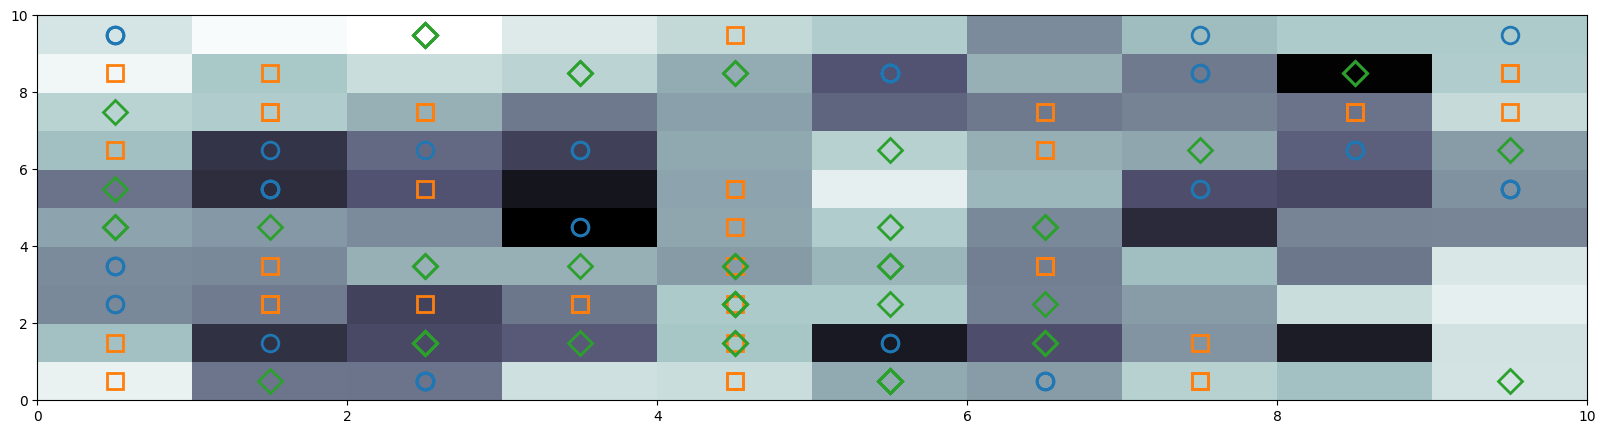

In [43]:
# Calculating distance matrix for plotting
umatrix = som.distance_map().T

# Plotting U-matrix with seaborn/matplotlib
plt.figure(figsize=(20,5))
plt.pcolor(umatrix, cmap='bone_r')

markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for i, k in enumerate(x):
    w = som.winner(k)  # getting the winner
    plt.plot(w[0] + .5, w[1] + .5, markers[y[i]], markerfacecolor='None', markeredgecolor=colors[y[i]], markersize=12, markeredgewidth=2)

plt.show()